# 6.2 Exploring Relationships

## This script contains the following:
### 1. Importing Visualization Libraries and Data
### 2. Data Cleaning
### 3. Exploring Relationships
 #### Correlations
 #### Scatterplots
 #### Pair Plots
 #### Categorical Plots
### 4. Answering Questions
### 5. Generatign Hypothesis


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
matplotlib.__version__

'3.7.0'

In [4]:
# Ensure the charts created are displayed in the notebook without the need to call them specificlly
%matplotlib inline

In [5]:
# Define path: 
path = r'/Users/tuyetnguyen/Desktop/Career Foundry/Achievement 6/09-2023 Airbnb Listings and Neighborhoods Analysis'

In [6]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_cleaned.csv'))

### 2. Data Cleaning

In [7]:
df.head()

Unnamed: 0        room_type  accommodates  bedrooms  bathrooms  \
0           0  Entire home/apt             5       2.0        2.0   
1           1  Entire home/apt             4       2.0        1.0   
2           2  Entire home/apt             2       1.0        1.0   
3           3  Entire home/apt             2       1.0        1.0   
4           4  Entire home/apt             4       1.0        1.0   

                                           amenities  price  minimum_nights  \
0  ['[Private patio or balcony', ' Ceiling fan', ...  240.0               4   
1  ['[45\\ HDTV with Netflix', ' HBO Max', ' Hulu...  200.0               3   
2  ['[Dryer \\u2013\\u00a0In unit', ' Carbon mono...   81.0              30   
3  ['[Baking sheet', ' Carbon monoxide alarm', ' ...  125.0              30   
4  ['[Free driveway parking on premises \\u2013 1...  128.0              30   

   maximum_nights  number_of_reviews  ...  review_scores_accuracy  \
0             200                 24  ...                    4.92   
1            1125                 60  ...                    4.98   
2             731                  2  ...                    5.00   
3             150                 28  ...                    4.96   
4            1125                 31  ...                    4.77   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.83                   5.00   
1                       4.98                   4.98   
2                       5.00                   5.00   
3                       4.96                   5.00   
4                       4.53                   4.87   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         5.00                    4.61                 4.65   
1                         5.00                    5.00                 4.83   
2                         5.00                    3.50                 5.00   
3                         5.00                    4.96                 4.89   
4                         4.77                    4.93                 4.33   

    neighborhood  latitude  longitude  total_amenities  
0  Columbia City  47.56555 -122.29385               67  
1     Green Lake  47.68243 -122.33086               68  
2          Adams  47.66646 -122.37650               30  
3    Wallingford  47.65480 -122.34042               35  
4       Montlake  47.64017 -122.32271               21  

[5 rows x 21 columns]

In [8]:
# Drop the Unnamed column:
df = df.drop(df.columns[0], axis=1)


In [9]:
df.shape

(5547, 20)

In [10]:
df.columns

Index(['room_type', 'accommodates', 'bedrooms', 'bathrooms', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'neighborhood', 'latitude', 'longitude',
       'total_amenities'],
      dtype='object')

In [11]:
df.dtypes

room_type                       object
accommodates                     int64
bedrooms                       float64
bathrooms                      float64
amenities                       object
price                          float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
neighborhood                    object
latitude                       float64
longitude                      float64
total_amenities                  int64
dtype: object

#### Missing Values Check:

In [12]:
# Check for missing values
df.isnull().sum() # No missing values

room_type                      0
accommodates                   0
bedrooms                       0
bathrooms                      0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
neighborhood                   0
latitude                       0
longitude                      0
total_amenities                0
dtype: int64

#### Duplicates Check

In [13]:
# Find duplicated
df_dups = df[df.duplicated()]

In [14]:
df_dups.shape # No duplicates

(0, 20)

#### Mixed-Type Data:

In [15]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns.

### 3. Exploring Relationships

#### Correlations:

In [16]:
# Calculate the price per room and create a new column 'price_per_room'
df['price_per_room'] = df['price'] / df['bedrooms']

In [17]:
# Define a mapping of room types to numerical values
room_type_mapping = {
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2
}

# Replace the 'room_type' column with numerical values
df['room_type'] = df['room_type'].replace(room_type_mapping)

In [18]:
# Create a subset of variables from the data set for the exploratory visual analysis.
sub = df[['room_type','bedrooms', 'bathrooms', 'total_amenities', 'number_of_reviews', 'review_scores_rating','review_scores_accuracy',
'latitude', 'longitude', 'price_per_room']]

In [19]:
sub

room_type  bedrooms  bathrooms  total_amenities  number_of_reviews  \
0             0       2.0        2.0               67                 24   
1             0       2.0        1.0               68                 60   
2             0       1.0        1.0               30                  2   
3             0       1.0        1.0               35                 28   
4             0       1.0        1.0               21                 31   
...         ...       ...        ...              ...                ...   
5542          0       1.0        1.0               56                 33   
5543          1       1.0        1.0               24                102   
5544          0       1.0        1.0               16                  3   
5545          0       2.0        2.0               70                119   
5546          0       1.0        1.0               52                 10   

      review_scores_rating  review_scores_accuracy   latitude   longitude  \
0                     4.79                    4.92  47.565550 -122.293850   
1                     5.00                    4.98  47.682430 -122.330860   
2                     5.00                    5.00  47.666460 -122.376500   
3                     5.00                    4.96  47.654800 -122.340420   
4                     4.60                    4.77  47.640170 -122.322710   
...                    ...                     ...        ...         ...   
5542                  4.88                    4.94  47.639282 -122.306259   
5543                  4.69                    4.73  47.615580 -122.341770   
5544                  3.00                    5.00  47.608740 -122.337440   
5545                  4.85                    4.91  47.571290 -122.290860   
5546                  4.30                    4.60  47.659520 -122.347850   

      price_per_room  
0              120.0  
1              100.0  
2               81.0  
3              125.0  
4              128.0  
...              ...  
5542            78.0  
5543           272.0  
5544           215.0  
5545            94.5  
5546           280.0  

[5547 rows x 10 columns]

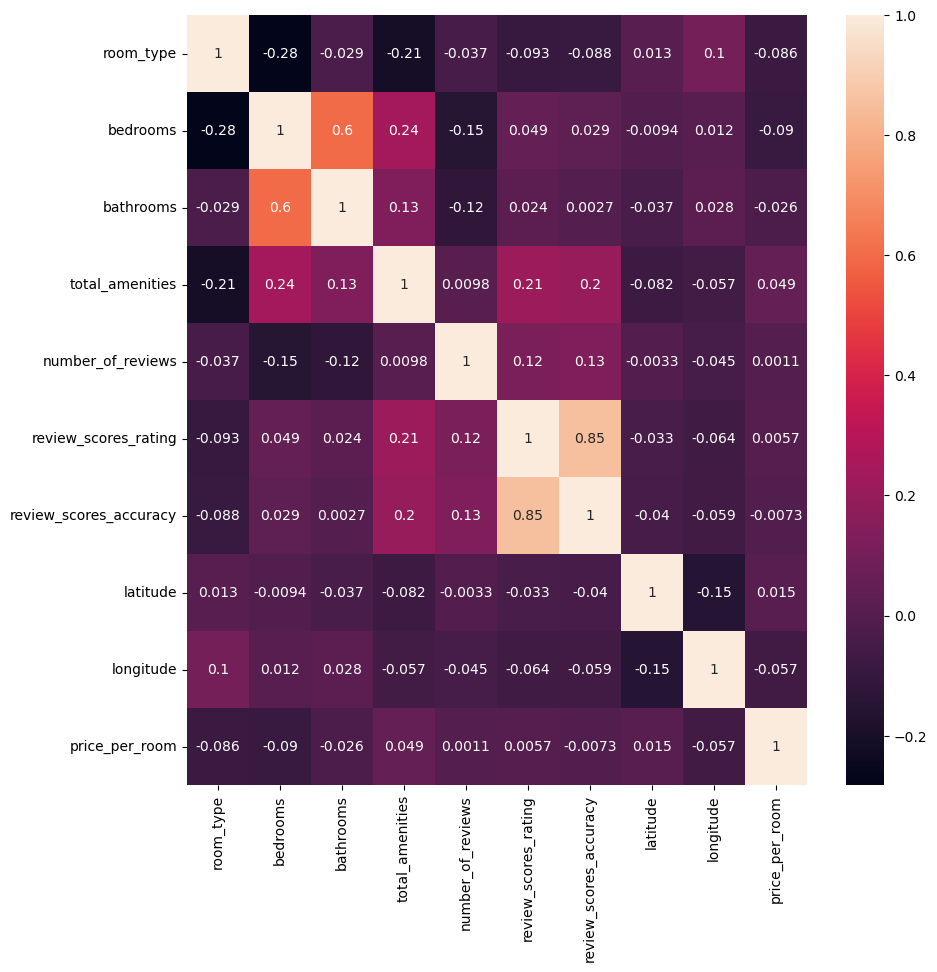

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [21]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correllation_heatmap.png'), bbox_inches = 'tight')

The fact that the coefficients are close to zero (between -0.009 and 0.015) suggests that there is no strong linear correlation between 'price_per_room' and the other variables. In other words, changes in these other variables are not strongly and consistently associated with changes in 'price_per_room' in a linear fashion. If there are non-linear relationships between 'price_per_room' and other variables, they might not be captured by these coefficients.

#### Scatterplots:

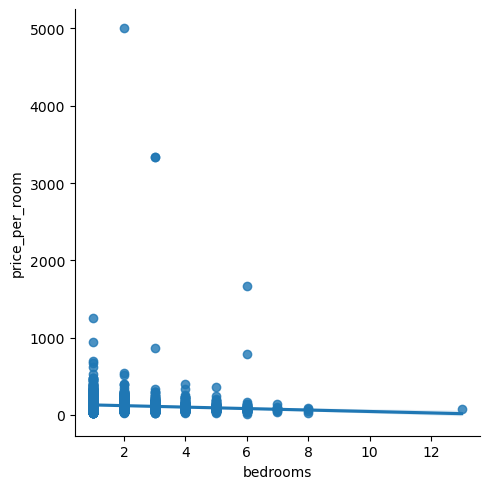

In [23]:
# Create a sctterplot for the 'bedrooms' and price

scatter = sns.lmplot(x = 'bedrooms', y = 'price_per_room', data = df)

In the scatter plot presented above, we observe a subtle negative relationship between the number of bedrooms and price per room. As the number of bedrooms increases, price_per_room tends to decrease, suggesting that properties with more bedrooms may offer a lower price per room on average. This relationship is characterized by a loosely downward-sloping trendline. However, it's important to note the presence of a few outliers on the right side of the plot, which deviate from this trend.

Interestingly, we also observe that listings with fewer bedrooms exhibit a wider range of listing prices. This indicates that factors other than just the number of bedrooms, such as location, amenities, or property type, may significantly influence pricing for listings with fewer bedrooms.

Overall, while the negative correlation is noticeable, it is relatively weak, and other variables likely play a substantial role in determining the final listing price. Further analysis, including the consideration of additional features and potential interactions, may provide a more comprehensive understanding of the dynamics influencing Airbnb pricing in this datase.

In [25]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'num_bed_price.png'), bbox_inches = 'tight')

#### Pair Plots:

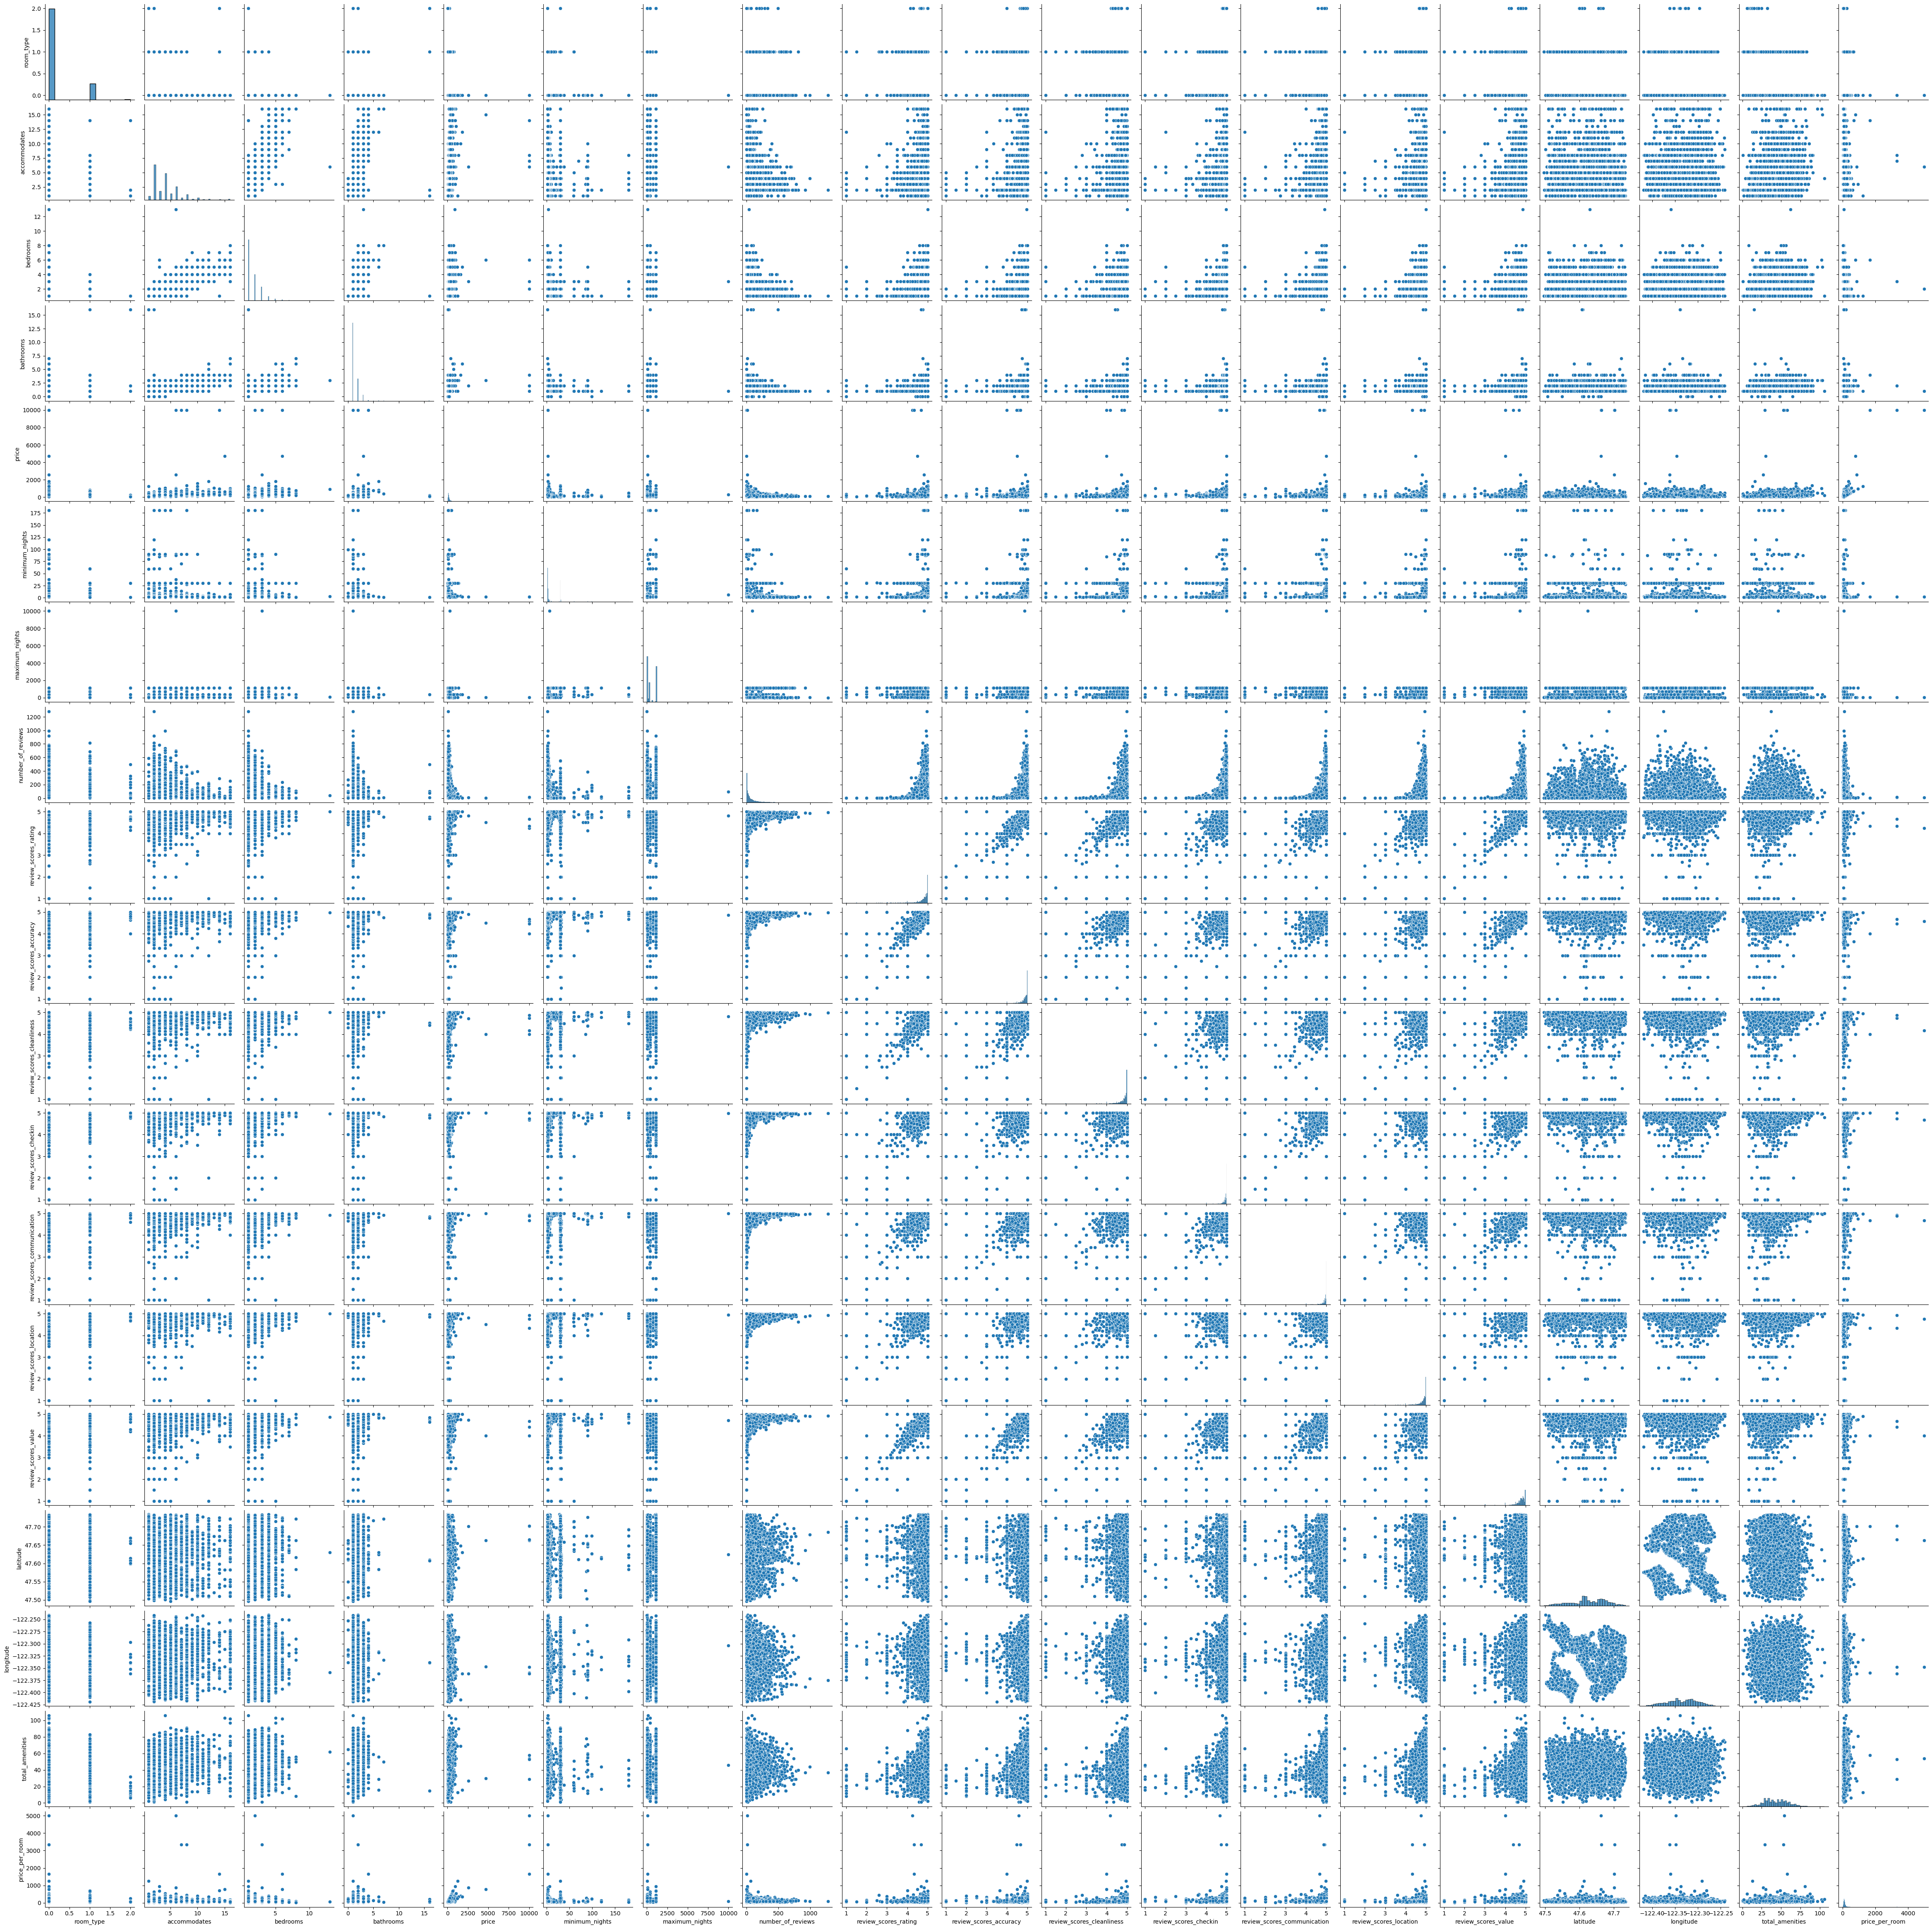

In [26]:
g = sns.pairplot(df)

No discernible trend or pattern found in a pair plot, it suggests that there is little to no linear relationship between the variables.

In [28]:
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pair_plot.png'), bbox_inches = 'tight')

#### Categorical Plots:

In this analysis, the analyst decided to exclude 'price_per_room' values that exceeded 1000 to ensure that our analysis would not be disproportionately influenced by a small number of unusually high-priced listings.

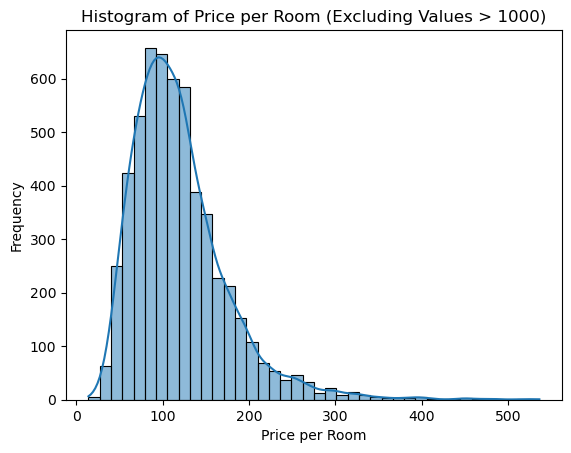

In [29]:
# Filter the DataFrame to exclude 'price_per_room' values above 1000
filtered_df = df[df['price_per_room'] <= 600]

# Create the histogram plot
hist = sns.histplot(filtered_df['price_per_room'], bins=40, kde=True)

# Add labels and title if needed
plt.xlabel('Price per Room')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Room (Excluding Values > 1000)')

# Show the plot
plt.show()

<p> Categorize the price range ($):<br>
Affordable: under 100<br>
Moderate: 101 - 200<br>
Expensive: 201 - 300<br>
Luxury: 301 - 600<br> </p>

In [30]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_histogram.png'), bbox_inches = 'tight')

In [31]:
filtered_df.loc[filtered_df['price_per_room'] <= 100, 'Price category'] = 'Affordable'

/var/folders/w9/pkl3gf8n3r15zz38pnqh486w0000gn/T/ipykernel_25307/347249548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['price_per_room'] <= 100, 'Price category'] = 'Affordable'


In [32]:
filtered_df.loc[(df['price_per_room'] > 100) & (filtered_df['price_per_room'] <= 200), 'Price category'] = 'Moderate'

In [33]:
filtered_df.loc[(filtered_df['price_per_room'] > 201) & (df['price_per_room'] <= 300), 'Price category'] = 'Expensive'

In [34]:
filtered_df.loc[(df['price_per_room'] > 301) & (df['price_per_room'] <= 000), 'Price category'] = 'Luxury'

In [35]:
filtered_df['Price category'].value_counts(dropna = False)
#NaN count is the number of room with price_per_room over $1000.

Moderate      2777
Affordable    2369
Expensive      319
NaN             71
Name: Price category, dtype: int64

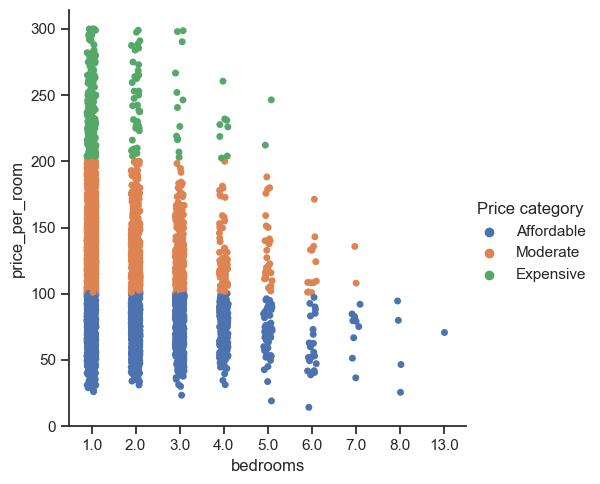

In [36]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g2 = sns.catplot(x="bedrooms", y="price_per_room", hue="Price category", data=filtered_df)

<p>  The plot clearly illustrates a negative correlation between the number of bedrooms and the number of listings available. As the number of bedrooms increases, the availability of listings decreases. Additionally, it's evident that the price range becomes more constrained as the number of bedrooms increases. Affordable rooms are distributed across all property types, offering options for budget-conscious individuals. However, properties with fewer than 5 bedrooms tend to have a concentration of moderately priced rooms. The most expensive listings are predominantly those with only 1 or 2 bedrooms. </p>

In [37]:
g2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_category.png'), bbox_inches = 'tight')

### 4.  Answering questions:
<p> Based on the exploration conducted so far these questions can be answer:
    
1.	What are the most common property types within different Seattle neighborhoods? 
    Private room 
    
    
2.	Is there a correlation between the number of bedrooms and rental prices across neighborhoods? 
    Yes. When there are more bedrooms, rental prices tend to be more similar, indicating a narrowing of the price range. This suggests that  properties with fewer bedrooms may exhibit more pricing flexibility.
    
    
6.	Do the review scores correlate with listing prices?
    No clear linear correlation exists between review scores and listing prices. </p>

### 5. Generatign Hypothesis
The proximity of a property to popular tourist attractions positively correlates with its average rental price.

In [65]:
# Export dataset 
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_prepared.csv'))